In [1]:
import matplotlib.pyplot as plt

import random
import math
import numpy as np

steps = 1000
graph_interval = steps / 20
X0 = 50
S0 = 100

# initialize securities number and price for each step
X = [X0] * steps
S = [S0] * steps

# random jump from step to step, ranging from selling 2 units to buying to units
def random_trader():
    return np.random.randint(-2, 3)

def random_transact(x, trade_transactions):
    for i in range(1, trade_transactions):
        x[i] = x[i - 1] + random_trader()
        
random_transact(X, steps)

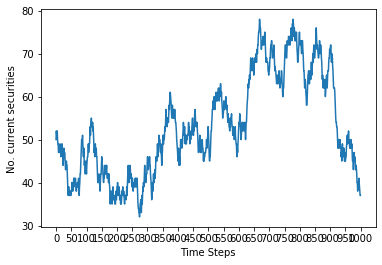

In [2]:
plt.plot(X)
plt.xticks(np.arange(0, steps + 1, graph_interval))
plt.xlabel('Time Steps')
plt.ylabel('No. current securities')
plt.show()

In [3]:
## independent random variable in volativity
xi = np.insert(np.random.normal(0, 1.0, steps - 1), 0, 0.0)

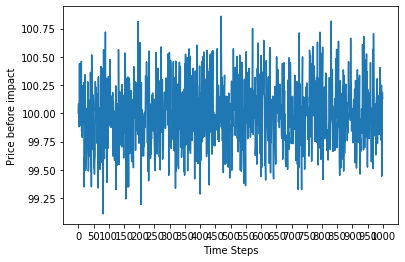

In [4]:
## price dynamics
# volativity factors
def volativity_factor(volativity, xi):
    return volativity * xi

volativity = 0.3

S =[S[i] + volativity_factor(volativity, xi[i]) for i in range(steps)]

plt.plot(S)
plt.xticks(np.arange(0, steps + 1, graph_interval))
plt.xlabel('Time Steps')
plt.ylabel('Price before impact')
plt.show()

NameError: name 'graph_interval' is not defined

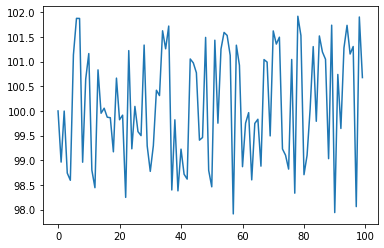

In [12]:
# impact
def permanent_impact(n, gamma):
    return gamma * n

def temporary_impact(n, epsilon, eta):
    return epsilon * np.sign(n) + eta * n

def expected_impact(n, gamma, espsilon, eta):
    return permanent_impact(n, gamma) + temporary_impact(n, epsilon, eta)

gamma = 0.1
epsilon = 0.1
eta = 0.1

n = np.insert(-np.diff(X), 0, 0)
S = [S[i] + expected_impact(n[i], gamma, epsilon, eta) for i in range(steps)]

plt.plot(S)
plt.xticks(np.arange(0, steps + 1, graph_interval))
plt.xlabel('Time Steps')
plt.ylabel('Price after impact')
plt.show()